In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt
import math
import numpy as np

from effsim.paramgen import uniform_param_generator
from effsim.paramgen import distribution_param_generator
from effsim.effsim import EventSimulator
from effsim.effsim import NoiseMaker

from pytpc.hdfdata import HDFDataFile

import pytpc
from pytpc.tpcplot import pad_plot, chamber_plot
from pytpc.constants import degrees, pi

import csv
import yaml
import h5py

# Generating Parameters

In [4]:
with open('/home/taylor/Documents/independent-research/event-gen/config_e15503b_C.yml', 'r') as f:
    config = yaml.load(f)
    
beam_enu0 = config['beam_enu0']
#print(beam_enu0)
beam_mass = config['beam_mass']
beam_charge = config['beam_charge']
mass_num = config['mass_num']
max_beam_angle = (config['max_beam_angle']*math.pi)/180
beam_origin_z = config['beam_origin_z']

gas = pytpc.gases.InterpolatedGas('isobutane', 19.2)

# number of events to create
num_evts = 10

In [49]:
#Generator Python object
pgen = uniform_param_generator(beam_enu0, beam_mass, beam_charge, mass_num, max_beam_angle, beam_origin_z, gas, num_evts)

In [50]:
#for params in pgen:
#    print(params)

In [69]:
# of the form ([x0, y0, z0, enu0, azi0, pol0], [beam vector (3d)])
p = next(pgen)

#p[0][0] = 0.0
#p[0][1] = 0.0
#p[0][2] = 4.80774631e-01

print(p)
print(p[0])
print(p[1])

(array([  5.22031273e-03,  -1.53616360e-03,   8.72789307e-01,
         1.09101408e+02,   1.45601378e+00,   2.93483143e+00]), array([ 0.01953227, -0.00574769, -0.99979271]))
[  5.22031273e-03  -1.53616360e-03   8.72789307e-01   1.09101408e+02
   1.45601378e+00   2.93483143e+00]
[ 0.01953227 -0.00574769 -0.99979271]


In [70]:
sim = EventSimulator(config)

In [71]:
#Creating simulated spiral from track parameters
#Finds center with an analytical function
#Uses EventGenerator to project the spiral onto the pad plane
evtClean, ctr = sim.make_event(p[0][0], p[0][1], p[0][2], p[0][3], p[0][4], p[0][5])



In [66]:
print(len(evtClean))

213


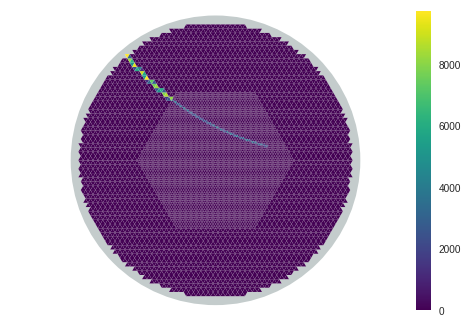

In [68]:
hits = np.zeros(10240)
for k, v in evtClean.items():
    #if hitmask[k]:
    hits[k] += v.max()
        
fig, sm = pad_plot(hits, scale='linear', cmap='viridis')
plt.colorbar(sm)

#plt.savefig('/home/taylor/Documents/independent-research/event-gen/plots/carbon/C_evt_00.pdf')

# Adding Noise

# Converting simulated events to Event objects

In [128]:
pyevtClean = sim.convert_event(evtClean)




# Plots

/usr/local/lib/python3.6/site-packages/pytpc-1.1.0-py3.6-linux-x86_64.egg/pytpc/evtdata.py:187: RuntimeWarning: invalid value encountered in true_divide
  return np.sum(peak_data * range_idx, axis=-1) / peak_data.sum(axis=-1)


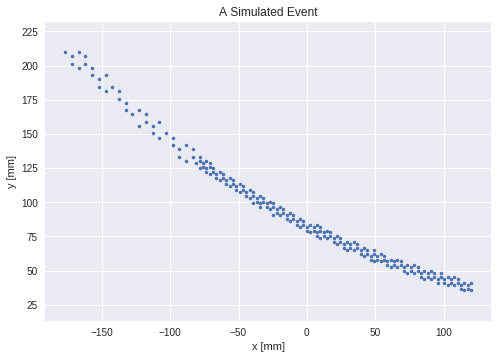

In [129]:
new_xyzs = pyevtClean.xyzs(peaks_only=True, return_pads=True, baseline_correction=True, cg_times=True)
plt.plot(new_xyzs[:,0], new_xyzs[:,1], '.')
plt.axis('equal')
    
plt.title('A Simulated Event')
    
plt.xlabel('x [mm]')
plt.ylabel('y [mm]')

/usr/local/lib/python3.6/site-packages/pytpc-1.1.0-py3.6-linux-x86_64.egg/pytpc/evtdata.py:187: RuntimeWarning: invalid value encountered in true_divide
  return np.sum(peak_data * range_idx, axis=-1) / peak_data.sum(axis=-1)


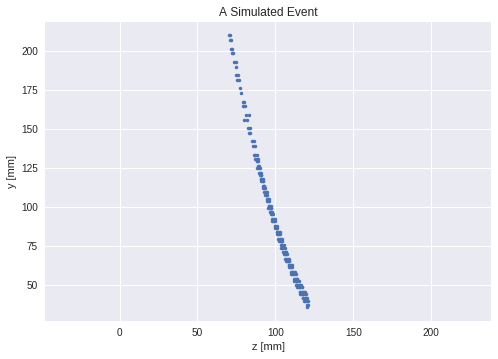

In [130]:
new_xyzs = pyevtClean.xyzs(peaks_only=True, return_pads=True, baseline_correction=True, cg_times=True)
plt.plot(new_xyzs[:,2], new_xyzs[:,1], '.')
plt.axis('equal')
    
plt.title('A Simulated Event')
    
plt.xlabel('z [mm]')
plt.ylabel('y [mm]')

(-191.54387670528283,
 135.09917248719822,
 26.735383922114337,
 218.5889976088732)

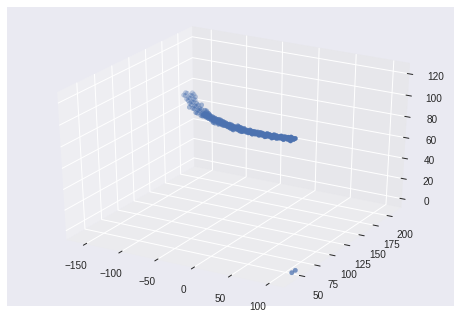

In [131]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

new_xyzs = pyevtClean.xyzs(peaks_only=True, return_pads=True, baseline_correction=False, cg_times=False)
#print(len(new_xyzs[:,2]))
ax.scatter(new_xyzs[:,0], new_xyzs[:,1],new_xyzs[:,2])
ax.axis('equal')

#fig.savefig('/home/taylor/Documents/independent-research/event-gen/plots/noiseCompare_p3d.pdf')

/usr/local/lib/python3.6/site-packages/pytpc-1.1.0-py3.6-linux-x86_64.egg/pytpc/evtdata.py:187: RuntimeWarning: invalid value encountered in true_divide
  return np.sum(peak_data * range_idx, axis=-1) / peak_data.sum(axis=-1)
/usr/local/lib/python3.6/site-packages/pytpc-1.1.0-py3.6-linux-x86_64.egg/pytpc/tpcplot.py:168: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  ax.set_axis_bgcolor('none')


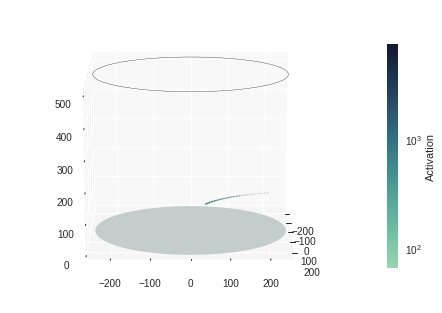

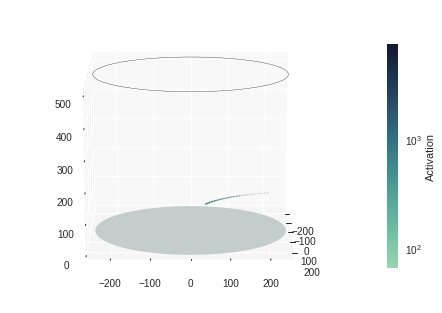

In [134]:
new_xyzs_clean = pyevtClean.xyzs(peaks_only=True, return_pads=True, baseline_correction=True, cg_times=True)

chamber_plot(new_xyzs_clean[:])
#plt.savefig('/home/taylor/Documents/independent-research/event-gen/plots/chamber_plot.pdf')